## Load Data

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'data/sky_camera.xlsx'
data = pd.read_excel(file_path)


In [2]:
# Display the first few rows of the dataset
data.head()

,File Name,File Name.1,Timestamp,real GHI
0,20221031013000_0.jpg,130,1:30,0.0
1,20221031013100_0.jpg,131,1:31,0.0
2,20221031013200_0.jpg,132,1:32,0.0
3,20221031013300_0.jpg,133,1:33,0.0
4,20221031013400_0.jpg,134,1:34,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   File Name    880 non-null    object 
 1   File Name.1  880 non-null    int64  
 2   Timestamp    880 non-null    object 
 3   real GHI     880 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 27.6+ KB


In [4]:
data.shape

(880, 4)

#  Preprocess the Data

In [5]:
image_path='data/images'

# Create the new 'image_path' column
data['image_path'] = data['File Name'].apply(lambda x: f'data/images/{x}')

In [6]:
data.head()

,File Name,File Name.1,Timestamp,real GHI,image_path
0,20221031013000_0.jpg,130,1:30,0.0,data/images/20221031013000_0.jpg
1,20221031013100_0.jpg,131,1:31,0.0,data/images/20221031013100_0.jpg
2,20221031013200_0.jpg,132,1:32,0.0,data/images/20221031013200_0.jpg
3,20221031013300_0.jpg,133,1:33,0.0,data/images/20221031013300_0.jpg
4,20221031013400_0.jpg,134,1:34,0.0,data/images/20221031013400_0.jpg


In [7]:
data.columns

Index(['File Name', 'File Name.1', 'Timestamp', 'real GHI', 'image_path'], dtype='object')

In [8]:
data.rename(columns={
    'File Name' : 'file_name',
    'File Name.1' : 'file_name1',
    'Timestamp': 'timestamp',
    'real GHI' : 'ghi'
}, inplace=True)

In [9]:
data.head()

,file_name,file_name1,timestamp,ghi,image_path
0,20221031013000_0.jpg,130,1:30,0.0,data/images/20221031013000_0.jpg
1,20221031013100_0.jpg,131,1:31,0.0,data/images/20221031013100_0.jpg
2,20221031013200_0.jpg,132,1:32,0.0,data/images/20221031013200_0.jpg
3,20221031013300_0.jpg,133,1:33,0.0,data/images/20221031013300_0.jpg
4,20221031013400_0.jpg,134,1:34,0.0,data/images/20221031013400_0.jpg


In [10]:
import os

# Function to check if the file exists
def check_file_existence(file_path):
    return 'Yes' if os.path.exists(file_path) else 'No'

In [11]:
# Create the new 'file_existance' column
data['file_existance'] = data['image_path'].apply(check_file_existence)

In [12]:
data.head()

,file_name,file_name1,timestamp,ghi,image_path,file_existance
0,20221031013000_0.jpg,130,1:30,0.0,data/images/20221031013000_0.jpg,Yes
1,20221031013100_0.jpg,131,1:31,0.0,data/images/20221031013100_0.jpg,Yes
2,20221031013200_0.jpg,132,1:32,0.0,data/images/20221031013200_0.jpg,Yes
3,20221031013300_0.jpg,133,1:33,0.0,data/images/20221031013300_0.jpg,Yes
4,20221031013400_0.jpg,134,1:34,0.0,data/images/20221031013400_0.jpg,Yes


In [13]:
data_filtered = data[data['file_existance'] == 'Yes']

In [14]:
data_filtered.shape

(880, 6)

In [15]:
# Find Invalid Data where no image found
invalid_data = data[data['file_existance'] == 'No']

In [16]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       880 non-null    object 
 1   file_name1      880 non-null    int64  
 2   timestamp       880 non-null    object 
 3   ghi             880 non-null    float64
 4   image_path      880 non-null    object 
 5   file_existance  880 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.4+ KB


In [17]:
# Remove outlier
def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame column using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column from which to remove outliers.

    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    #Q1 = df[column].quantile(0.25)
    #Q3 = df[column].quantile(0.75)
    #IQR = Q3 - Q1
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    
    lower_bound=0
    upper_bound=600.0
    
    df_cleaned = df[(df[column] > lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

In [18]:
data_filtered['ghi'].describe()

count    880.000000
mean     337.465337
std      296.806543
min        0.000000
25%        0.001200
50%      314.072100
75%      625.448625
max      801.920600
Name: ghi, dtype: float64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

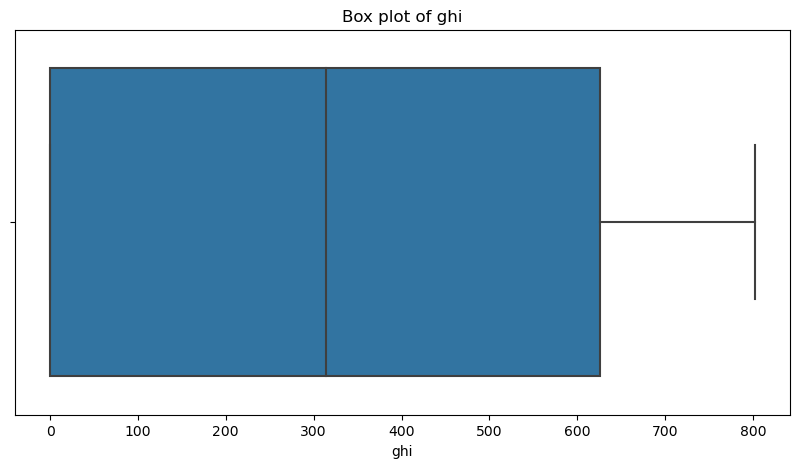

In [20]:
# Step 1: Plot a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['ghi'])
plt.title('Box plot of ghi')
plt.show()

In [21]:
# Remove outlier
#data_filtered = remove_outliers_iqr(data_filtered, 'ghi')

#threshold = 600
#data_filtered = data_filtered[data_filtered['ghi'] <= threshold]
 

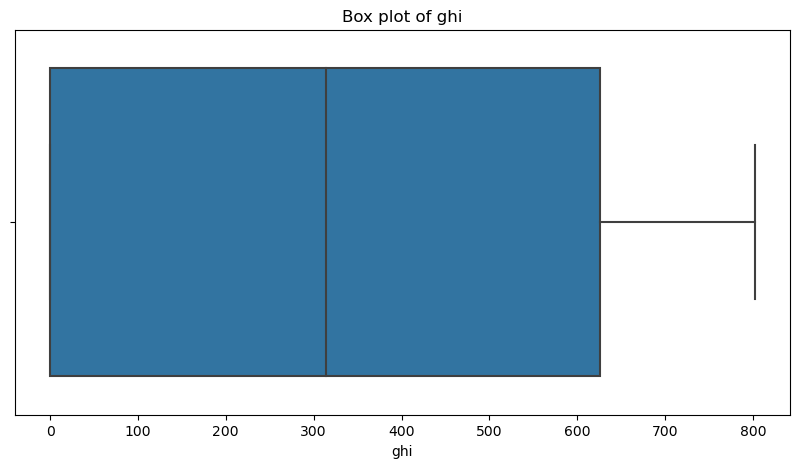

In [22]:
# Step 1: Plot a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['ghi'])
plt.title('Box plot of ghi')
plt.show()

In [23]:
data_filtered['ghi'].describe()

count    880.000000
mean     337.465337
std      296.806543
min        0.000000
25%        0.001200
50%      314.072100
75%      625.448625
max      801.920600
Name: ghi, dtype: float64

In [24]:
# Save invalid data into csv
data_filtered.to_csv('data/valid_data.csv',  header=True, index=False)

# Save invalid data into csv
invalid_data.to_csv('data/invalid_data.csv',  header=True, index=False)

In [25]:
#!pip3 install opencv-python
#!pip install tensorflow

In [26]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [27]:
# Assuming 'data' DataFrame contains 'image_path' and 'ghi' columns
# Preprocess images and GHI values
#image_size = (128, 128)  # Resize to 128x128
#image_size = (192, 256)  # Resize to 192x256
image_size = (250, 250)  # Resize to 250x250

In [28]:
# Function to load and preprocess images
def preprocess_image(img_path):
    image = load_img(img_path, target_size=image_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize to [0, 1]
    return image

In [30]:
# Read images and GHI values

# -- features
images = np.array([preprocess_image(path) for path in data_filtered['image_path'].values])

# -- Target 
ghi_values = data_filtered['ghi'].values

In [31]:
max_ghi = ghi_values.max()

print(f"GHI Max = {max_ghi}")

# Normalize GHI values
ghi_values = ghi_values / ghi_values.max()

GHI Max = 801.9206


# Build the Model

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, ghi_values, test_size=0.2, random_state=42)

# shape=(128, 128, 3)
# shape=(192, 256, 3)
# shape=(384, 512, 3)

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Regression output
])

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
model.summary()

C:\Users\obaidulhaque.sarker\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,872,449 (52.92 MB)

 Trainable params: 13,872,449 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 13.8141 - mae: 1.7486 - val_loss: 0.1242 - val_mae: 0.3171
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.1423 - mae: 0.3244 - val_loss: 0.0938 - val_mae: 0.2654
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0868 - mae: 0.2398 - val_loss: 0.0141 - val_mae: 0.1001
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.0416 - mae: 0.1504 - val_loss: 0.0405 - val_mae: 0.1559
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0476 - mae: 0.1572 - val_loss: 0.0069 - val_mae: 0.0656
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0406 - mae: 0.1359 - val_loss: 0.0115 - val_mae: 0.0897
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0477 - mae: 0.1547 - val_loss: 0.0098 - val_mae: 0.0827
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.0342 - mae: 0.1241 - val_loss: 0.0131 - val_mae: 0.0884
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.03

Epoch 55/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0269 - mae: 0.1104 - val_loss: 0.0054 - val_mae: 0.0594
Epoch 56/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0331 - mae: 0.1202 - val_loss: 0.0046 - val_mae: 0.0431
Epoch 57/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0349 - mae: 0.1192 - val_loss: 0.0081 - val_mae: 0.0722
Epoch 58/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0320 - mae: 0.1195 - val_loss: 0.0113 - val_mae: 0.0869
Epoch 59/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0242 - mae: 0.1036 - val_loss: 0.0103 - val_mae: 0.0855
Epoch 60/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0278 - mae: 0.1137 - val_loss: 0.0038 - val_mae: 0.0382
Epoch 61/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0250 - mae: 0.1114 - val_loss: 0.0087 - val_mae: 0.0784
Epoch 62/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0328 - mae: 0.1171 - val_loss: 0.0097 - val_mae: 0.0802
Epoch 63/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - lo

### Evaluate the Model

In [34]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume 'model' is trained model
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step
Mean Absolute Error (MAE): 0.051499549441618324
Mean Squared Error (MSE): 0.004264418063224212
R-squared (R²): 0.9693939407154194


### Actual GHI vs Predicted GHI

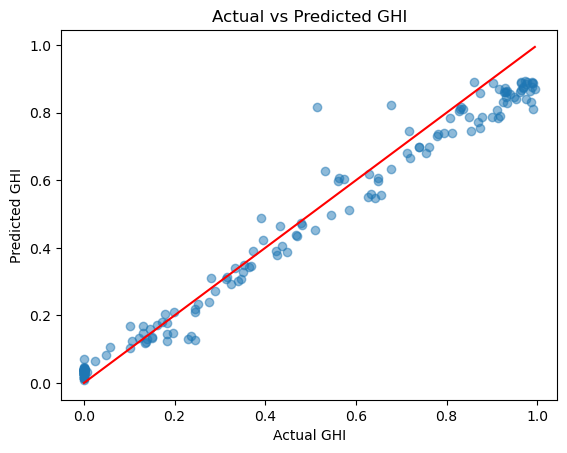

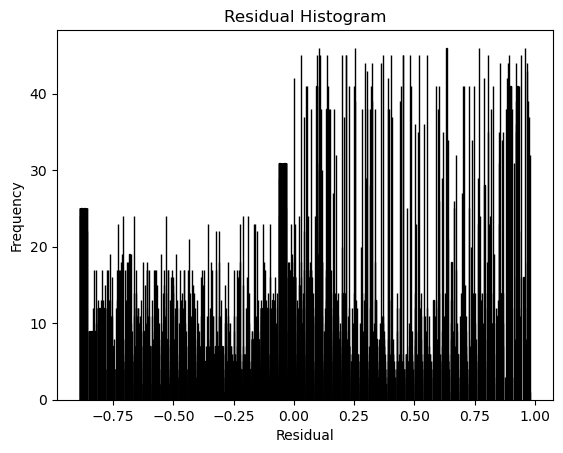

In [35]:
## Visualize Results

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted GHI values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Actual vs Predicted GHI')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()


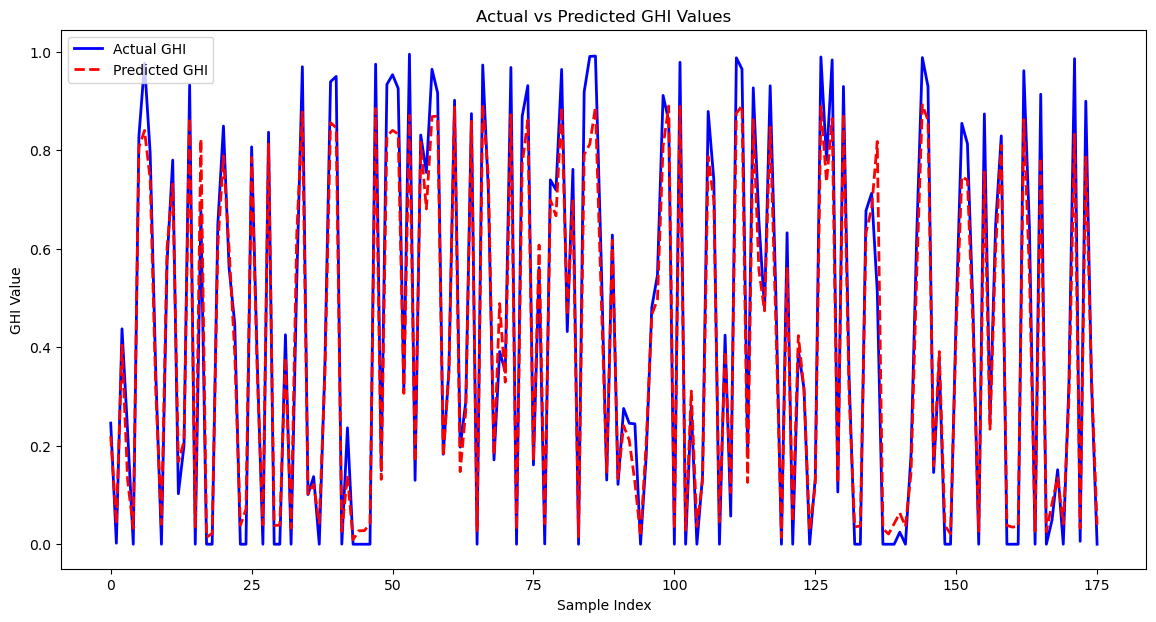

In [36]:
# Plot actual vs predicted GHI values
import matplotlib.pyplot as plt

# Plotting actual vs predicted GHI values
plt.figure(figsize=(14, 7))

# Plot actual GHI values
plt.plot(y_test, label='Actual GHI', color='blue', linewidth=2)

# Plot predicted GHI values
plt.plot(predictions, label='Predicted GHI', color='red', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('GHI Value')
plt.title('Actual vs Predicted GHI Values')
plt.legend()

# Show the plot
plt.show()


In [37]:
import numpy as np

# Predict GHI values using the model
predicted_ghi = model.predict(X_test).flatten() * max_ghi

actual_ghi = y_test * max_ghi

# Calculate the difference
difference = actual_ghi - predicted_ghi

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Actual GHI': actual_ghi,
    'Predicted GHI': predicted_ghi,
    'Difference': difference
})


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step


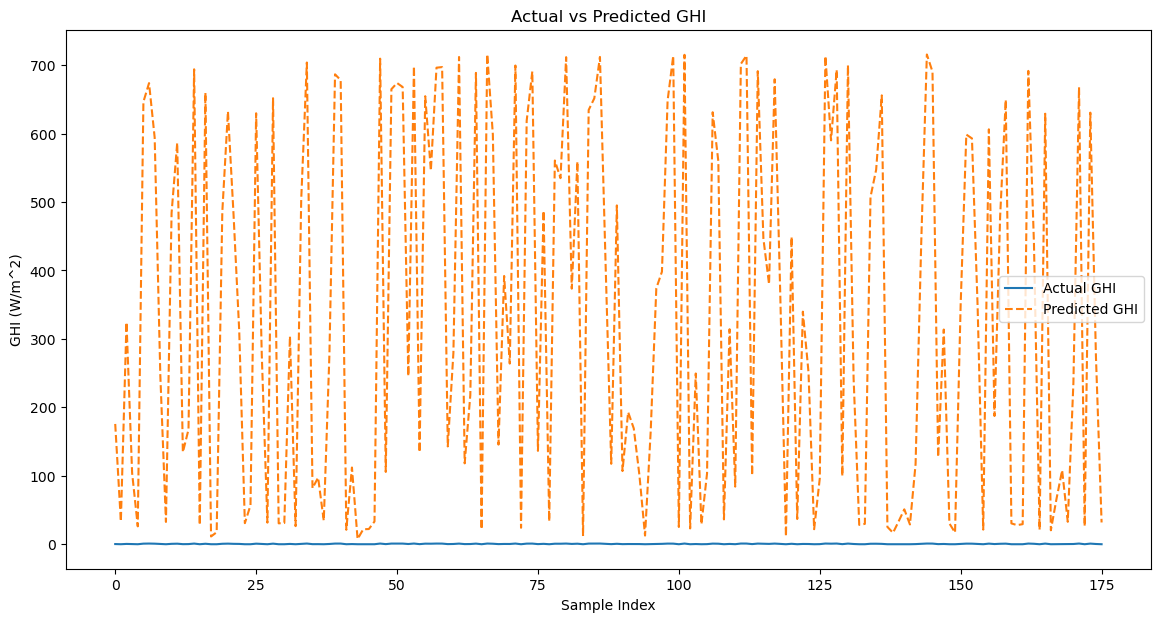

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual GHI')
plt.plot(predicted_ghi.flatten(), label='Predicted GHI', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted GHI')
plt.xlabel('Sample Index')
plt.ylabel('GHI (W/m^2)')
plt.show()


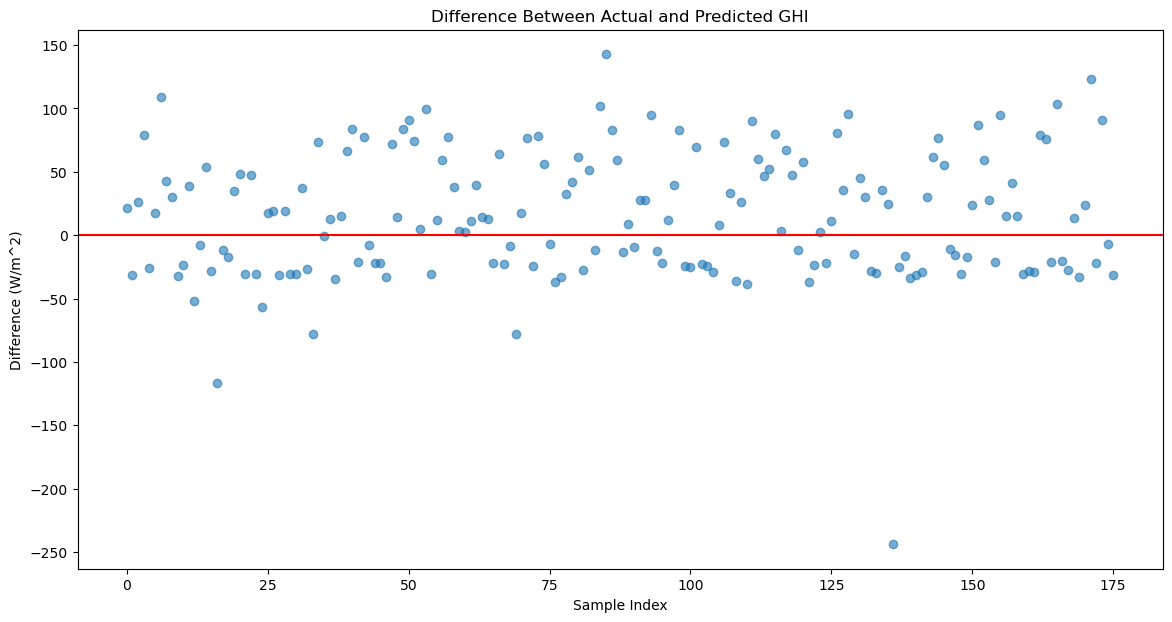

In [39]:
plt.figure(figsize=(14, 7))
plt.scatter(range(len(y_test)), difference, alpha=0.6)
plt.title('Difference Between Actual and Predicted GHI')
plt.xlabel('Sample Index')
plt.ylabel('Difference (W/m^2)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [40]:
# Save the results to a CSV file
results.to_csv('data/actual_vs_predicted_ghi.csv', index=False)


# Hyperparameters Tuning

In [41]:
#!pip install keras-tuner --upgrade


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3), activation='relu', input_shape=(250, 250, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Conv2D(filters=hp.Int(f'filters_{i+2}', min_value=32, max_value=128, step=32),
                         kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])),
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error'])
    return model

In [43]:
# Tunning

from kerastuner import RandomSearch
import tensorflow as tf

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=30,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='ghi_prediction'
)

# Prepare TensorFlow data
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Perform the hyperparameter search
tuner.search(train_data, epochs=50, validation_data=val_data)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


C:\Users\obaidulhaque.sarker\AppData\Local\Temp\ipykernel_32760\1836780703.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


Reloading Tuner from hyperparameter_tuning\ghi_prediction\tuner0.json


In [44]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(train_data, epochs=100, validation_data=val_data)

# Evaluate the model on validation data
val_loss, val_mae = best_model.evaluate(val_data)
print(f'Validation MAE: {val_mae}')


C:\Users\obaidulhaque.sarker\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - loss: 1.3419 - mean_absolute_error: 1.3419 - val_loss: 0.3141 - val_mean_absolute_error: 0.3141
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.2638 - mean_absolute_error: 0.2638 - val_loss: 0.0928 - val_mean_absolute_error: 0.0928
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0737 - mean_absolute_error: 0.0737 - val_loss: 0.0614 - val_mean_absolute_error: 0.0614
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0527 - mean_absolute_error: 0.0527 - val_loss: 0.0483 - val_mean_absolute_error: 0.0483
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0399 - mean_absolute_error: 0.0399 - val_loss: 0.0380 - val_mean_absolute_error: 0.0380
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0304 - mean_absolute_error: 0.0304 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0276 - mean_absolute_error: 0.0276 - val_loss

22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0141 - mean_absolute_error: 0.0141 - val_loss: 0.0182 - val_mean_absolute_error: 0.0182
Epoch 46/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0109 - mean_absolute_error: 0.0109 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187
Epoch 47/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0106 - mean_absolute_error: 0.0106 - val_loss: 0.0184 - val_mean_absolute_error: 0.0184
Epoch 48/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0113 - mean_absolute_error: 0.0113 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203
Epoch 49/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0113 - mean_absolute_error: 0.0113 - val_loss: 0.0181 - val_mean_absolute_error: 0.0181
Epoch 50/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0103 - mean_absolute_error: 0.0103 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 51/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0174 - mean_absolute_error: 0.0174 - val_loss: 0.03

22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - val_loss: 0.0185 - val_mean_absolute_error: 0.0185
Epoch 90/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.0178 - val_mean_absolute_error: 0.0178
Epoch 91/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0074 - mean_absolute_error: 0.0074 - val_loss: 0.0169 - val_mean_absolute_error: 0.0169
Epoch 92/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - loss: 0.0095 - mean_absolute_error: 0.0095 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175
Epoch 93/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0089 - mean_absolute_error: 0.0089 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 94/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - loss: 0.0104 - mean_absolute_error: 0.0104 - val_loss: 0.0253 - val_mean_absolute_error: 0.0253
Epoch 95/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 0.0178 - mean_absolute_error: 0.0178 - val_loss: 0.02

### Save the Model for deployment

In [45]:
import joblib

joblib.dump(best_model, 'models/tuned_ghi_prediction_model.pkl')

['models/tuned_ghi_prediction_model.pkl']

### Actual GHI vs Predicted GHI with Tunned Model

In [46]:
import numpy as np

# Predict GHI values using the model
predicted_ghi = best_model.predict(X_test).flatten() * max_ghi

actual_ghi = y_test * max_ghi

# Calculate the difference
difference = actual_ghi - predicted_ghi

# Create a DataFrame to store the results
results = pd.DataFrame({
    
    'Actual GHI': actual_ghi,
    'Predicted GHI': predicted_ghi,
    'Difference': difference
})

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 432ms/step


In [47]:
results.head()

,Actual GHI,Predicted GHI,Difference
0,197.1709,218.409348,-21.238448
1,1.6948,5.663006,-3.968206
2,350.7096,377.139221,-26.429621
3,183.2545,192.229874,-8.975374
4,0.0000,3.367211,-3.367211


In [48]:
# Save the results to a CSV file
results.to_csv('data/tuned_actual_vs_predicted_ghi.csv', index=False)

# Evaluate the Tuned model

In [49]:
# -- features
X_test = np.array([preprocess_image(path) for path in data_filtered['image_path'].values])

# -- Target 
y_test = data_filtered['ghi'].values

In [50]:
max_ghi = y_test.max()

print(f"GHI Max = {max_ghi}")

# Normalize GHI values
y_test = y_test / max_ghi

GHI Max = 801.9206


In [51]:
import joblib

# Load the saved best model
model = joblib.load('models/tuned_ghi_prediction_model.pkl')

In [52]:
# Predict GHI values
predicted_ghi = model.predict(X_test)


28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step


In [53]:
# Calculate the difference between predicted and actual GHI values
difference = y_test*max_ghi - predicted_ghi.flatten()*max_ghi


In [54]:
data_filtered.columns

Index(['file_name', 'file_name1', 'timestamp', 'ghi', 'image_path',
       'file_existance'],
      dtype='object')

In [55]:
# Create a DataFrame for results
results_df = pd.DataFrame({
    'file_name': data_filtered['file_name'],
    'timestamp': data_filtered['timestamp'],
    'image_path': data_filtered['image_path'],
    'ghi': y_test * max_ghi,
    'predicted_ghi': (predicted_ghi.flatten())*max_ghi,
    'difference': difference
})


In [56]:
results_df.head()

,file_name,timestamp,image_path,ghi,predicted_ghi,difference
0,20221031013000_0.jpg,1:30,data/images/20221031013000_0.jpg,0.0,2.789315,-2.789315
1,20221031013100_0.jpg,1:31,data/images/20221031013100_0.jpg,0.0,1.922794,-1.922794
2,20221031013200_0.jpg,1:32,data/images/20221031013200_0.jpg,0.0,1.939018,-1.939018
3,20221031013300_0.jpg,1:33,data/images/20221031013300_0.jpg,0.0,2.230472,-2.230472
4,20221031013400_0.jpg,1:34,data/images/20221031013400_0.jpg,0.0,2.511394,-2.511394


In [57]:
# Save the results to a CSV file
results_df.to_csv('data/ghi_predictions.csv', index=False)

In [58]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume 'model' is trained model
#predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predicted_ghi)
mse = mean_squared_error(y_test, predicted_ghi)
r2 = r2_score(y_test, predicted_ghi)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.017762380353436892
Mean Squared Error (MSE): 0.0011139505012549946
R-squared (R²): 0.9918590424971144
